# Image classification

### Importing the required libraries. 

In [1]:
import numpy as np
import os 
import tensorflow as tf 
import tensorflow_hub as hub
from keras.models import load_model
import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
import matplotlib.pyplot as plt


### Using the intel image classification dataset from kaggle.  Link-https://www.kaggle.com/puneet6060/intel-image-classification

In [5]:
train_path='./intel image/seg_train/seg_train'
valid_path='./intel image/seg_test/seg_test'

### Defining base generator without data augmentation.

In [6]:
train_generator_base=ImageDataGenerator(rescale=1./255) # Normalizing images by rescaling them. 
valid_generator_base=ImageDataGenerator(rescale=1./255)


### Loading data directly from directory. 

In [7]:
train_data=train_generator_base.flow_from_directory(train_path,target_size=(224,224),batch_size=16)
valid_data=valid_generator_base.flow_from_directory(valid_path,target_size=(224,224),batch_size=16)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


### Exploring the data. 

In [8]:
for image_batch,label_batch in train_data:
    print('Shape of image batch is:',image_batch.shape)
    print('Shape of label batch is:',label_batch.shape)
    break

Shape of image batch is: (16, 224, 224, 3)
Shape of label batch is: (16, 6)


In [9]:
class_names=os.listdir(train_path)
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


### Plotting sample images.

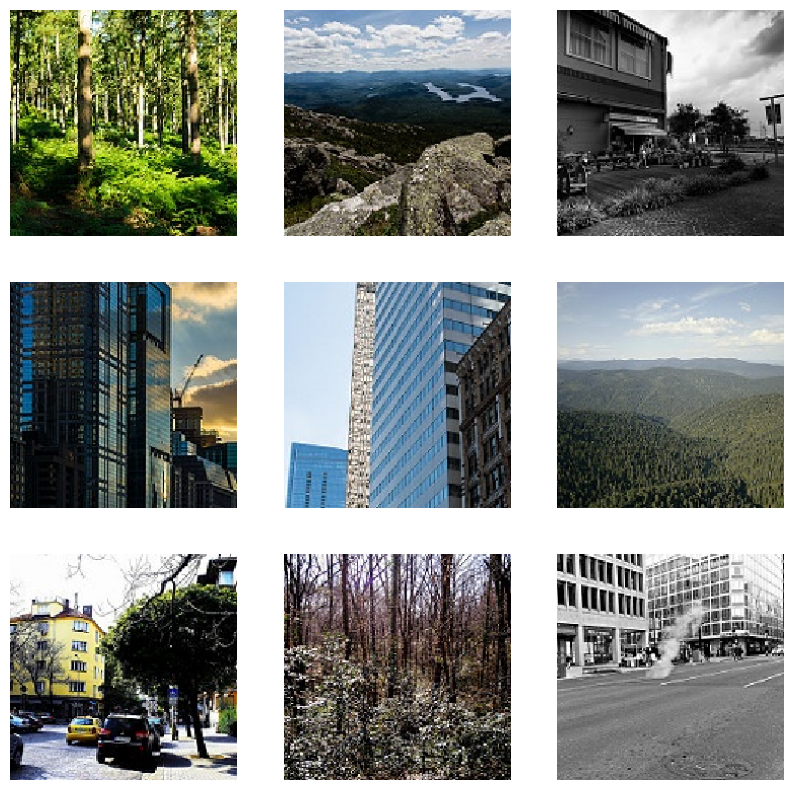

In [10]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i])
    plt.axis('off')

### Early stopping callback to avoid overfitting. 

In [11]:
callbacks=keras.callbacks.EarlyStopping(monitor='val_loss',verbose=2,patience=4,restore_best_weights=True)

### Using tensorflow hub to download Feature vector layer which is basically a classifier without the top. 

In [12]:
mobile_net_url='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
feature_extractor_layer=hub.KerasLayer(mobile_net_url,input_shape=(224,224,3)) # Converts feature vector layer to keras layer.

In [13]:
feature_extractor_layer.trainable=False # Making the layer non-trainable to use the pre-loaded weights.

### Adding the Dense layer with 6 units because of 6 classes in our dataset. 

In [14]:
model=Sequential([feature_extractor_layer,
                       layers.Dense(6)])

### Compiling the model. 

In [15]:
model.compile(optimizer=Adam(learning_rate=0.001), 
                       loss=CategoricalCrossentropy(from_logits=True),  
                       metrics=['accuracy'])

### Summary of base model. 

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


### Training the model. 

In [ ]:
#Checking whether GPU is configured for training.
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [17]:
base_history=model.fit(train_data,epochs=20,callbacks=[callbacks],validation_data=valid_data)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
878/878 [==============================] - ETA: 0s - loss: 0.3060 - accuracy: 0.8896WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000019D1CB341F8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
878/878 [==============================] - 50s 57ms/step - loss: 0.3060 - accuracy: 0.8896 - val_loss: 0.2642 - val_accuracy: 0.9060
Epoch 2/20
878/878 [==============================] - 49s 56ms/step - loss: 0.2181 - accuracy: 0.9191 - val_loss: 0.2391 - val_accuracy: 0.9080
Epoch 3/20
878/878 [==============================] - 50s 57ms/step - loss: 0.1914 - accuracy: 0.9293 - val_loss: 0.2306 - val_accuracy: 0.9183
Epoch 4/20
878/878 [==============================] - 49s 56ms/step - loss: 0.1768 - accuracy: 0.9356 - val_loss: 0.2306 - val_accuracy: 0.9110
Epoch 5/20
878/878 [==============================] - 50s 57ms/step - loss: 0.1611 - accuracy: 0.9396 - val_loss: 0.2412 - v

In [ ]:
print('Maximum validation accuracy of base data is:',max(base_history.history['val_accuracy']))

Maximum validation accuracy of base data is: 0.9183333516120911


### Plotting the loss during training.

In [ ]:
plt.title('Loss')
plt.plot(base_history.history['loss'], label='train')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

### Plotting the accuracy during training.

In [ ]:
plt.title('Accuracy')
plt.plot(base_history.history['accuracy'],label='train')
plt.plot(base_history.history['val_accuracy'],label='val_accuracy')

In [ ]:
model.save('model.h5')